Classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658 (10.38 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5538 - loss: 0.6859 - val_accuracy: 0.5740 - val_loss: 0.6820
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6287 - loss: 0.6560 - val_accuracy: 0.5964 - val_loss: 0.6657
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6292 - loss: 0.6504 - val_accuracy: 0.5942 - val_loss: 0.6605
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6424 - loss: 0.6373 - val_accuracy: 0.5964 - val_loss: 0.6508
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6499 - loss: 0.6294 - val_accuracy: 0.6233 - val_loss: 0.6438
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6550 - loss: 0.6244 - val_accuracy: 0.6188 - val_loss: 0.6433
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6305 - loss: 0.6207 - val_accuracy: 0.6300 - val_loss: 0.6387
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6660 - loss: 0.6107 - val_accuracy: 0.6233 - val_loss:

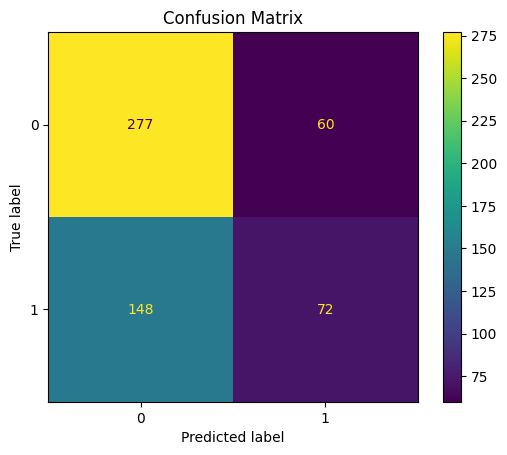

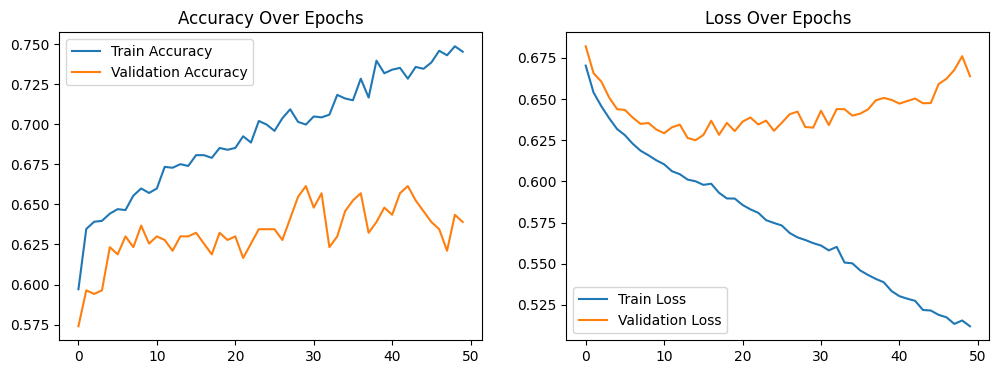

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Load and prepare data
def load_data(filepath, target_column):
    """Load CSV and split into features/target"""
    data = pd.read_csv('/content/sample_data/Water_Potability.csv')
    X = data.drop(columns=['Potability']).values
    y = data['Potability'].values
    return X, y

# 2. Build and train model
def build_model(input_shape, n_classes=2):
    """Create a simple ANN"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')  # Change to sigmoid for binary
    ])

    loss = 'sparse_categorical_crossentropy'  # Change to binary_crossentropy for binary
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    model.summary()
    return model

# 3. Main workflow
def main(csv_path, target_column):
    # Load data
    X, y = load_data(csv_path, target_column)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Determine number of classes
    n_classes = len(np.unique(y))

    # Build and train model
    model = build_model((X_train.shape[1],), n_classes)
    history = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    # Evaluate
    y_pred = np.argmax(model.predict(X_test), axis=1)

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Configure these parameters
    CSV_FILE = '/content/sample_data/Water_Potability.csv'  # Replace with your file path
    TARGET_COLUMN = 'Potability'    # Replace with your target column name

    main(CSV_FILE, TARGET_COLUMN)



Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Load data from CSV
data = pd.read_csv('/content/sample_data/house_price.csv')  # Replace with your file
X = data.drop(columns=['price']).values  # Features
y = data['price'].values  # Target (continuous values)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features (critical for regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Build ANN model for regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # No activation for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5. Train the model
history = model.fit(X_train, y_train,
                   epochs=500,
                   batch_size=8,
                   validation_split=0.2,
                   verbose=1)

# 6. Evaluate the model
y_pred = model.predict(X_test)

print("\nRegression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 7. Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# 8. Optional: Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Example 1

# upload dataset

In [5]:
# read and make a dataframe of data
wq=pd.read_csv('/content/sample_data/Water_Potability.csv')

# preprocessing

In [6]:
# show the first 5(default) rows
wq.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,0.000000,214.846144,49456.58711,7.897539,583.448849,7.702328,4.928840,0
1,0.227499,152.530111,39028.59934,3.462492,443.029232,13.201943,3.545741,1
2,0.975578,221.204114,31145.11074,7.615583,439.112765,21.145954,2.533996,0
3,0.989912,133.216942,16922.85390,9.293289,322.291191,10.430076,5.160604,1
4,1.431782,228.130383,12937.24689,6.214773,495.379883,12.033344,4.948443,0


In [7]:
# show the dimensions of the dataframe
wq.shape

(2785, 8)

In [8]:
# show the columns' names
wq.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
# determine X and y
y=wq['Potability']
x = wq[['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Turbidity']]
print(x)
# print(y)

             ph    Hardness       Solids  Chloramines  Conductivity  \
0      0.000000  214.846144  49456.58711     7.897539    583.448849   
1      0.227499  152.530111  39028.59934     3.462492    443.029232   
2      0.975578  221.204114  31145.11074     7.615583    439.112765   
3      0.989912  133.216942  16922.85390     9.293289    322.291191   
4      1.431782  228.130383  12937.24689     6.214773    495.379883   
...         ...         ...          ...          ...           ...   
2780  12.246928  217.368014  11318.14056     8.465160    347.653054   
2781  13.175402   47.432000  19237.94968     8.907020    500.245952   
2782  13.349889  152.776455  18464.90077     6.717973    450.846369   
2783  13.541240  187.606792  13475.91277     6.756055    411.264465   
2784  14.000000  235.677458  24008.99204     5.635029    460.745267   

      Organic_carbon  Turbidity  
0           7.702328   4.928840  
1          13.201943   3.545741  
2          21.145954   2.533996  
3          

In [10]:
x.shape
# y.shape

(2785, 7)

In [11]:
# splitting the dataset to the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=70)

In [12]:
# print the shape of splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1949, 7)
(836, 7)
(1949,)
(836,)


# Building a model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# build the model using sequential  and Dense layers and seperate the using ','
# Dense: fully connected layers
# units: number of neurons in each layer

model = Sequential([
    Dense(units=10,activation='sigmoid'),
    Dense(10,activation='sigmoid'),
    Dense(1,activation='sigmoid'),
    ])

In [31]:
# determin the loss function and the optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

In [32]:
# fit the model using X and y
# epoch: number of one complete forward and back propagation
# batch size: data is fed to the model in groups
history=model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6214 - loss: 0.6638
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6122 - loss: 0.6685
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6105 - loss: 0.6688
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 0.6717
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 0.6698
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.6755
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5946 - loss: 0.6756
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5991 - loss: 0.6737
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5972 - loss: 0.6744
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6008 - loss: 0.6729
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6026 - loss: 0.6722
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━

dict_keys(['accuracy', 'loss'])


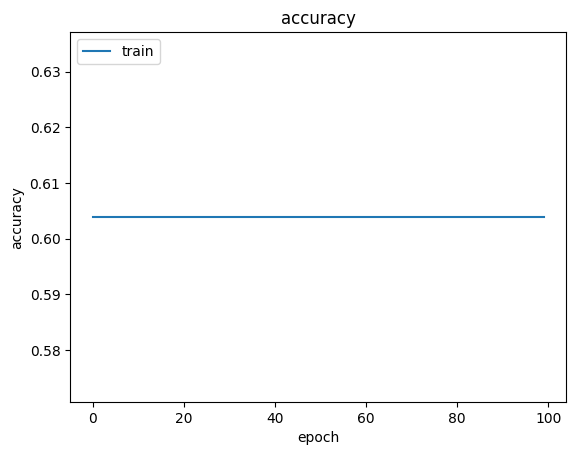

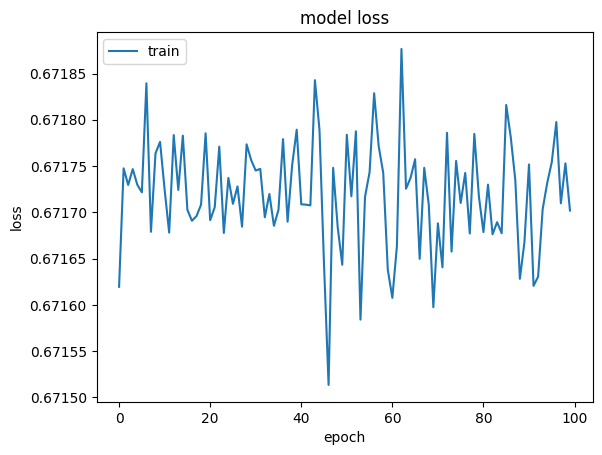

In [33]:
# plot some diagrams for a better intution
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# number of parameters and layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203 (816.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [34]:
# predicting the results for testset
y_pred=model.predict(x_test)
y_pred


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.3965893 ],
       [0.396

In [35]:
# change the results to 0/1 due to a threshold (=0.5)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [36]:
# calculate f1 score which is a combination of precision and recall
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
f1

0.0

# Example 2

In [37]:
# read and make a dataframe of data
co=pd.read_csv('/content/sample_data/Car_Ownership.csv')

In [38]:
# show the first 5(default) rows
co.head()

,Monthly Income,Credit Score,Finance Status,Car
0,4500,660,0,0
1,4500,660,0,0
2,20000,600,0,0
3,20000,600,0,0
4,2500,550,0,0


In [39]:
# show the dimensions of the dataframe
co.shape

(84, 4)

In [40]:
# show the columns' names
co.columns

Index(['Monthly Income', 'Credit Score', 'Finance Status', 'Car'], dtype='object')

In [41]:
# determine X and y
y=co['Car']
x = co[['Monthly Income', 'Credit Score', 'Finance Status']]
print(x)
# print(y)

    Monthly Income  Credit Score  Finance Status
0             4500           660               0
1             4500           660               0
2            20000           600               0
3            20000           600               0
4             2500           550               0
..             ...           ...             ...
79            8500           790               3
80            7000           780               3
81            7000           780               3
82            4000           750               3
83            4000           750               3

[84 rows x 3 columns]


In [42]:
x.shape
# y.shape

(84, 3)

In [43]:
# splitting the dataset to the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=70)

In [44]:
# print the shape of splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67, 3)
(17, 3)
(67,)
(17,)


In [45]:
# build the model using sequential  and Dense layers and seperate the using ','
# Dense: fully connected layers
# units: number of neurons in each layer

model = Sequential([
    Dense(units=10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid'),
    ])

In [46]:
# determin the loss function and the optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

In [47]:
# fit the model using X and y
# epoch: nuber of one complete forward and back propagation
# batch size: data is fed to the model in groups
history=model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4643 - loss: 3301.3765
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5397 - loss: 0.6928
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5363 - loss: 0.6927
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5484 - loss: 0.6923
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5024 - loss: 0.6932
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4963 - loss: 0.6934
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5519 - loss: 0.6916
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5580 - loss: 0.6912
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5823 - loss: 0.6903 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5858 - loss: 0.6901 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5250 - loss: 0.6923 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5493 - 

dict_keys(['accuracy', 'loss'])


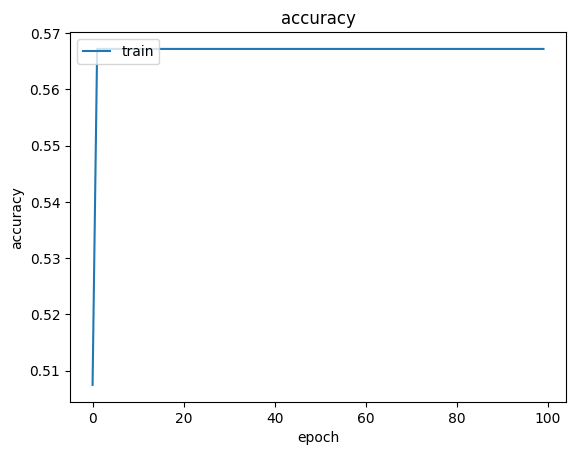

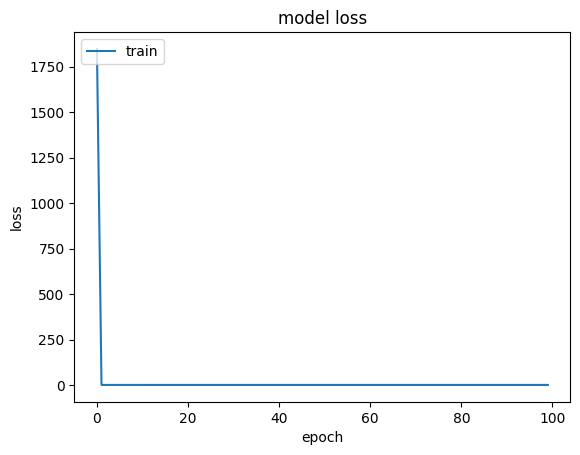

In [48]:
# plot some diagrams for a better intution
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# number of parameters and layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (656.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
# predicting the results for testset
y_pred=model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551],
       [0.5473551]], dtype=float32)

In [51]:
# change the results to 0/1 due to a threshold (=0.5)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [52]:
# calculate f1 score which is a combination of precision and recall
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
f1

0.5217391304347826

# Example 3

In [53]:
# read and make a dataframe of data
car=pd.read_csv('/content/sample_data/Car_data.csv')

In [54]:
# show the first 5(default) rows
car.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [55]:
# show the dimensions of the dataframe
car.shape

(1000, 4)

In [56]:
# show the columns' names
car.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [57]:
# determine X and y
y=car['Purchased']
x = car[['Gender', 'Age', 'AnnualSalary']]
print(x)
# print(y)

     Gender  Age  AnnualSalary
0         1   35         20000
1         1   40         43500
2         1   49         74000
3         1   40        107500
4         1   25         79000
..      ...  ...           ...
995       1   38         59000
996       0   47         23500
997       0   28        138500
998       0   48        134000
999       0   44         73500

[1000 rows x 3 columns]


In [58]:
# splitting the dataset to the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=70)

In [59]:
# print the shape of splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800,)
(200,)


In [60]:
# build the model using sequential  and Dense layers and seperate the using ','
# Dense: fully connected layers
# units: number of neurons in each layer

model = Sequential([
    Dense(units=5,activation='sigmoid'),
    Dense(5,activation='sigmoid'),
    Dense(1,activation='sigmoid'),
    ])

In [61]:
# determin the loss function and the optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

In [62]:
# fit the model using X and y
# epoch: nuber of one complete forward and back propagation
# batch size: data is fed to the model in groups
history=model.fit(x_train, y_train, epochs=100, batch_size=4)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4293 - loss: 0.8102
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4247 - loss: 0.7822
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4095 - loss: 0.7649
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4015 - loss: 0.7468
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4439 - loss: 0.7190
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4188 - loss: 0.7150
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4407 - loss: 0.7033
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4231 - loss: 0.6996
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4149 - loss: 0.6953
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 0.6902
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5907 - loss: 0.6880
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━

dict_keys(['accuracy', 'loss'])


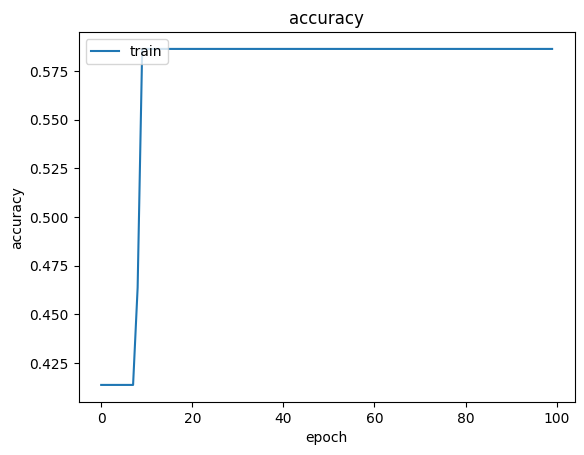

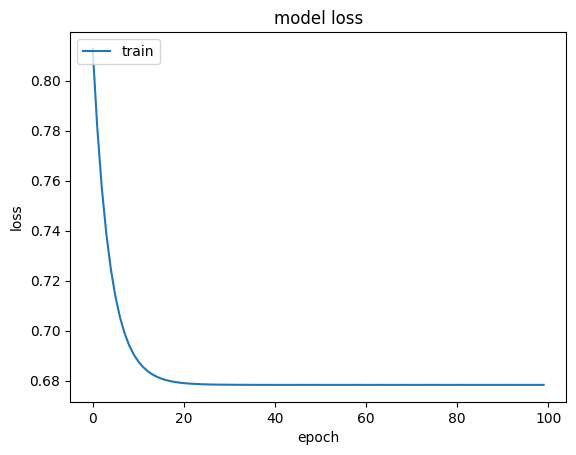

In [63]:
# plot some diagrams for a better intution
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (4, 5)                 │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (4, 5)                 │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (4, 1)                 │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58 (236.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
# predicting the results for testset
y_pred=model.predict(x_test)
y_pred

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.41369942],
       [0.413

In [66]:
# change the results to 0/1 due to a threshold (=0.5)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [67]:
# calculate f1 score which is a combination of precision and recall
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
f1

0.0